# 1. Data Loading and Initial Inspection

First, let's load the dataset and perform some basic inspections.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/airbnb-listings.csv', sep=";", low_memory=False)

In [39]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,Perfect location to enjoy Amsterdam's famous e...,NaN,NaN,NaN,I expect you to treat my beloved apartment as ...,https://a0.muscache.com/im/pictures/f3940538-4...,https://a0.muscache.com/im/pictures/f3940538-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/f3940538-4...,20786453,https://www.airbnb.com/users/show/20786453,Lithal,2014-09-01,"Amsterdam, North Holland, Netherlands",Hi there! As I love to travel myself I know ho...,within a day,50.0,NaN,https://a0.muscache.com/im/pictures/1a40195b-8...,https://a0.muscache.com/im/pictures/1a40195b-8...,Oud-West,1.0,1.0,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, North Holland 1054 AA, Ne...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,North Holland,1054 AA,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.365237,4.878250,Apartment,Entire home/apt,6.0,1.0,3.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,600.0,NaN,6000.0,500.0,50.0,4.0,50.0,2.0,1125.0,3 weeks ago,NaN,14.0,44.0,74.0,74.0,2017-04-02,31.0,2015-08-02,2016-11-27,89.0,9.0,8.0,9.0,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,NaN,Public transport is very close - 100 meters,NaN,You'll have the apartment for yourselves,no smoking inside no pets no load music after ...,NaN,NaN,https://public.opendatasoft.com/api/explore/v2...,NaN,11964927,https://www.airbnb.com/users/show/11964927,Hein,2014-02-05,"Amsterdam, North Holland, The Netherlands",I live together with my girlfriend in our apar...,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/11964927/prof...,https://a0.muscache.com/im/users/11964927/prof...,Oud-West,1.0,1.0,"email,phone,reviews,jumio,work_email","Oud-West, Amsterdam, Noord-Holland 1053, Nethe...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,Noord-Holland,1053,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.367309,4.873841,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,175.0,NaN,4000.0,400.0,40.0,2.0,30.0,2.0,112

In [40]:
df.shape

(494954, 89)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347018 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197590 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

### a. Check for missing values

Missing values can significantly affect the performance of your model, so it's important to know which columns have missing data

In [27]:
# Set Pandas to display all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)  # Ensure it doesn't wrap text

# Calculate missing values in each column and sort
missing_data = df.isnull().sum().sort_values(ascending=False)

# Display columns with missing data (if missing > 0)
print(missing_data[missing_data > 0])


Has Availability                  485647
Square Feet                       482745
License                           480358
Host Acceptance Rate              452696
Monthly Price                     398863
Weekly Price                      397207
Neighbourhood Group Cleansed      392791
Jurisdiction Names                360401
Notes                             297364
Security Deposit                  290942
Interaction                       238495
Access                            226555
Neighborhood Overview             203350
Host About                        198680
House Rules                       197939
Transit                           191168
Cleaning Fee                      179239
Neighbourhood                     149551
Space                             147936
Review Scores Value               129081
Review Scores Checkin             129036
Review Scores Location            128985
Review Scores Accuracy            128717
Review Scores Communication       128520
Review Scores Cl

# Description of Missing Data in the Dataset
The dataset contains 494,954 entries and 89 columns. Each column represents a different attribute of the Airbnb listings, and the dataset shows a varying degree of missing data across these columns. Here's a breakdown of the missing data, which reveals some important insights about the completeness of the dataset and areas where the information is sparse.

#### Key Observations:
#### 1. Columns with High Missing Data Counts:
Reviews per Month: Missing 122,007 values, showing that reviews data is also sparsely available for some listings.
First Review and Last Review: Missing 122,007 and 121,899 values respectively, indicating that reviews are not present for all listings.
Neighbourhood: Missing 149,551 values, which indicates that neighborhood data is not always available for listings.
Host About: This column is missing 198,677 values, suggesting that many host profiles do not include detailed descriptions about the host.
Jurisdiction Names: Missing 360,401 values, which indicates that jurisdiction data is missing for many listings.
Neighbourhood Group Cleansed: With 392,791 missing values, it indicates that the neighborhood grouping data is only available for a subset of listings.
Weekly Price and Monthly Price: Both columns have 397,207 and 398,863 missing values, respectively, which implies that many listings do not have these pricing details.
Host Acceptance Rate: This column has a significant 452,696 missing values, meaning a large portion of the data for this feature is unavailable. This could be due to hosts not setting or reporting their acceptance rate, or it may not be available for listings that are not accepting guests.
License: Missing 480,358 values, which means that most listings don’t have a license recorded in the dataset.
Has Availability: Missing 485,647 values, demonstrating that availability data is available for only a small fraction of listings.

#### 2. Columns with Moderate Missing Data:
Description: Missing 160 values, pointing to incomplete descriptions for certain listings.
Name: Missing 418 values, meaning that a small number of listings lack a name.
Host Location: Missing 2,263 values, meaning that location information about the host is not always provided.
Amenities: Missing 4,488 values, meaning that the feature list for some listings is incomplete.
Price: Missing 7,958 values, which is a relatively small portion compared to the overall dataset (~2%), but still significant enough to warrant attention when analyzing pricing.
Summary: Missing 16,201 values, indicating that a moderate portion of the listings do not have a description or summary provided.

#### 3. Columns with Low Missing Data:
Last Scraped: This column has only 1 missing value, meaning that the date for the most recent scrape is almost always recorded, and there is only one instance where it was missed. 
Room Type: Missing only 1 value, suggesting it's almost always recorded for listings. 
Geolocation: Missing 1 value, but it is still available for all remaining listings. Street: Missing 1 value, which likely corresponds to a listing with incomplete address information.
Latitude and Longitude: Both of these geographical columns are missing only 1 value, which indicates that most listings have geographical coordinates captured.
Cancellation Policy: Missing 2 values, indicating that the cancellation policy is recorded for nearly 100% of listings.
Smart Location, Country Code, and Country: These columns have 2 or 3 missing values, respectively, suggesting that geographical data is mostly available. 



# Summary and Impact of Missing Data:
- **High Missing Data Columns**: In cases where missing data is very high, we will drop the associated columns.

- **Columns with Moderate and Low Missing Data**: In cases where missing data is low to moderate, we may decide to impute using reasonable assumptions or drop individual rows on a case by case basis.

#### Conclusion:
This dataset contains a mix of columns with minimal missing data and columns with substantial missing data. By understanding the missing data distribution, we can make informed decisions on whether to impute or remove the missing values depending on their impact on our models. Handling missing data effectively will improve the accuracy and reliability of said models.

### b. Check for duplicates

In [42]:
# Check for duplicates in the data
duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


#### Description of Duplicate Rows:
The dataset contains 0 duplicate rows, meaning that each entry in the dataset is unique. This is a positive outcome, as it ensures that the data does not include redundant or repeated records, which can distort analysis or model performance. Having no duplicate rows helps maintain the integrity of the data, ensuring that each entry represents a distinct Airbnb listing without any repetitions.

### c. Check for data freshness

In [29]:
# Convert the 'Last Scraped' column to datetime format, coerce errors to NaT
df['Last Scraped'] = pd.to_datetime(df['Last Scraped'], errors='coerce')

# Get the earliest scrape date (min) and the most recent scrape date (max)
earliest_scrape = df['Last Scraped'].min()
recent_scrape = df['Last Scraped'].max()

# Print the earliest and most recent scrape dates
print(f"The earliest scrape date was: {earliest_scrape}")
print(f"The most recent scrape date was: {recent_scrape}")


The earliest scrape date was: 2015-10-12 00:00:00
The most recent scrape date was: 2017-06-15 00:00:00


### Data Freshness Explaination
Although the dataset spans from 2015 to 2017, it still holds significant value for analysis, particularly when exploring long-term trends, market evolution, and predictive modeling. Despite its age, this data can provide essential insights into the Airbnb market, offering a foundation for understanding key variables like pricing patterns, neighborhood popularity, and host behaviors. Additionally, the dataset's comprehensive nature makes it a valuable resource, especially when newer datasets may be less complete or accessible. This dataset serves as a useful baseline for comparing past and present market conditions, allowing for the identification of growth areas and the development of strategies that remain relevant today. By leveraging this historical data, we can uncover lasting insights that inform both current analysis and future predictions.

#### 1. Revealing Long-Term Trends:
Insight into Historical Patterns: Despite the dataset being from 2015 to 2017, it offers valuable insights into long-term trends. Understanding past pricing patterns, neighborhood popularity, and host behaviors can provide a foundation for predicting future trends, particularly in a market that has reached a certain level of stability.
Market Evolution: Analyzing the data from 2015-2017 allows you to uncover shifts in customer preferences, pricing fluctuations, and new amenities that may still apply today.
#### 2. Baseline for Comparison and Predictive Modeling:
Comparing with Newer Data: This dataset serves as an essential baseline for comparing more current data, helping you track how the market has evolved. It enables the measurement of growth in features, customer satisfaction, and price shifts.
Predictive Insights: Historical data can still be valuable for predictive modeling, with trends from 2015-2017 offering insights into future market behavior, especially if it is combined with more recent data.
#### 3. Data Completeness and Quality:
Comprehensive Dataset: Despite its age, the dataset is relatively complete, containing diverse features like pricing, host information, and reviews. This makes it a rich data source that may be more comprehensive than newer datasets, which could be more fragmented.
Data Availability: Finding a dataset that is both up-to-date and complete can be challenging. If more recent datasets are missing key features, this dataset provides a solid, all-encompassing foundation for analysis.
#### 4. Understanding Past Market Conditions:
Segmenting the Market: For those interested in analyzing the Airbnb market from 2015-2017, this data is crucial. It offers a clear view of how hosts and customers interacted during this period, helping to identify market segments, key growth areas, and strategies that can be applied today.

## 3. Variables and Their Distributions

For feature selection, understanding the distributions of variables is crucial. We will analyze both numerical and categorical variables.

### a. Numerical variables - Descriptive Statistics and Distribution Plots

# Display summary statistics for numerical columns

In [43]:
df.describe()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,4.949540e+05,379884.000000,494449.000000,494448.000000,494953.000000,494953.000000,494891.000000,493428.000000,494328.000000,494037.000000,12209.000000,486996.000000,97747.000000,96091.000000,204012.000000,315715.000000,494952.000000,494917.000000,494952.000000,4.949520e+05,494952.000000,494952.000000,494952.000000,494952.000000,494952.000000,367134.000000,366237.000000,366479.000000,365918.000000,366434.000000,365969.000000,365873.000000,494087.000000,372947.000000
mean,3.234417e+07,93.376549,9.549721,9.549738,38.042292,-15.020974,3.311584,1.249632,1.378322,1.934525,575.544762,138.072703,493.650127,2961.696277,274.126703,62.267906,1.550235,12.028728,3.470415,2.123406e+05,9.961726,22.997256,37.878594,166.092332,16.740850,92.913988,9.527773,9.328483,9.692770,9.709972,9.471171,9.323047,6.869659,1.479523
std,3.172156e+07,17.592441,57.199523,57.199579,22.941429,70.364294,2.094052,0.607029,0.942508,1.488128,1825.903405,149.670499,215.538103,4688.495984,171.605763,75.746943,1.224923,31.189786,89.396359,2.024385e+07,10.981093,22.351102,33.856420,140.510625,32.336701,8.543725,0.852536,1.035356,0.727947,0.719978,0.803260,0.903585,41.977381,1.731931
min,1.900000e+01,0.000000,0.000000,0.000000,-38.224427,-123.218712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,6.886060e+06,98.000000,1.000000,1.000000,38.913119,-73.969216,2.000000,1.000000,1.000000,1.000000,0.000000,55.000000,320.000000,1178.500000,150.000000,20.000000,1.000000,0.000000,1.000000,3.200000e+01,0.000000,0.000000,0.000000,14.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,2.188181e+07,100.000000,1.000000,1.000000,42.310894,2.137584,2.000000,1.000000,1.000000,1.000000,377.000000,90.000000,475.000000,1840.000000,200.000000,40.000000,1.000000,0.000000,2.000000,1.125000e+03,5.000000,17.000000,33.000000,148.000000,4.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.880000
75%,4.792177e+07,100.000000,3.000000,3.000000,51.375424,12.444849,4.000000,1.000000,2.000000,2.000000,800.000000,150.000000,650.000000,3000.000000,350.000000,75.000000,2.000000,15.000000,3.000000,1.125000e+03,19.000000,44.000000,71.000000,313.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.030000
max,1.350885e+08,100.000000,1114.000000,1114.000000,55.994889,153.637837,21.000000,10.000000,96.000000,19.000000,129167.000000,999.000000,999.000000,280016.000000,999.000000,999.000000,20.000000,999.000000,60000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000


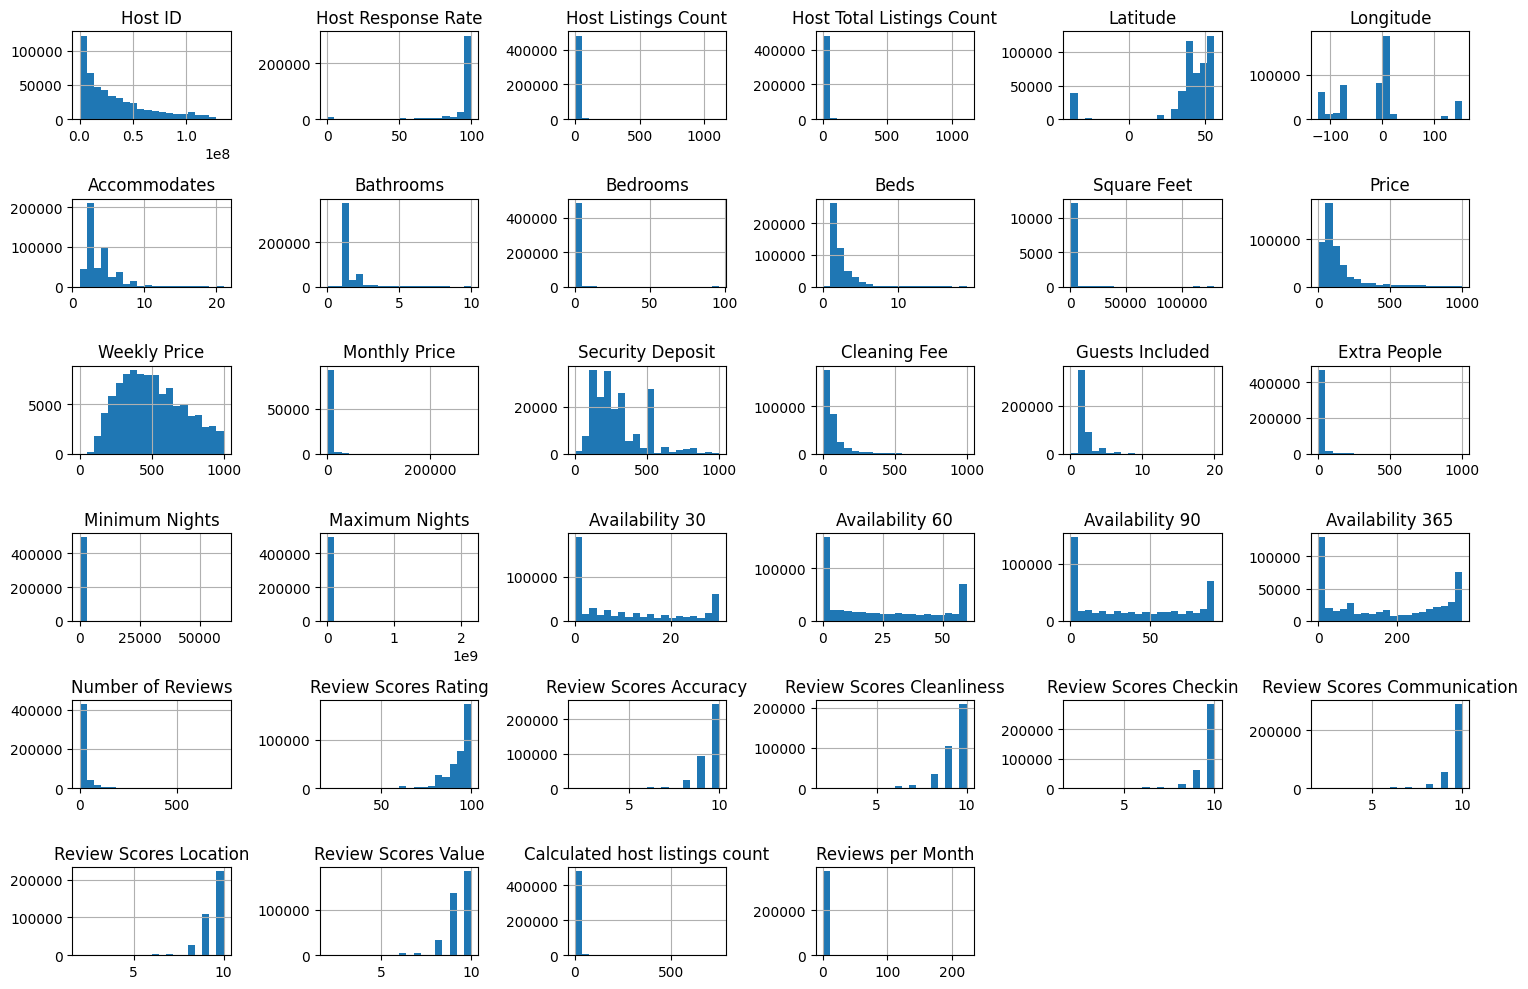

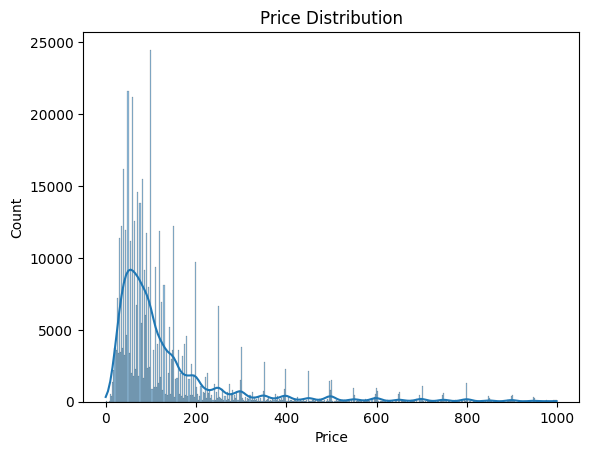

In [44]:
# Display summary statistics for numerical columns
df.describe()

# Plot histograms for numerical variables
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot individual distributions for key numerical variables like Price
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()


### b. Categorical variables - Frequency distributions

<Axes: xlabel='Room Type'>

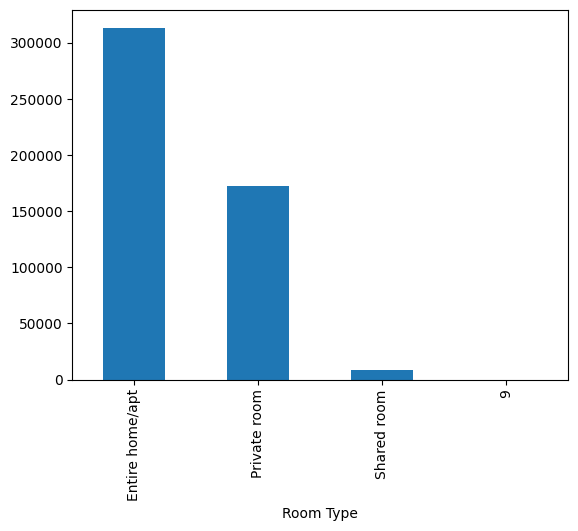

In [45]:
#room type
df['Room Type'].value_counts().plot(kind='bar')

In [3]:
#property type
df['Property Type'].value_counts().sort_values(ascending=False)


Property Type
Apartment                 351404
House                      93887
Bed & Breakfast            12080
Condominium                10237
Loft                        5933
Townhouse                   5930
Other                       3235
Villa                       3202
Guesthouse                  1639
Bungalow                    1216
Dorm                        1204
Boat                         967
Cabin                        788
Chalet                       641
Boutique hotel               514
Serviced apartment           416
Hostel                       395
Camper/RV                    381
Timeshare                    178
Guest suite                  142
Tent                          99
Vacation home                 73
Treehouse                     64
Castle                        64
In-law                        44
Earth House                   37
Yurt                          29
Hut                           29
Entire Floor                  18
Tipi                         

In [4]:
#cancellation policy
df['Cancellation Policy'].value_counts()

Cancellation Policy
strict                 182834
flexible               156371
moderate               122245
moderate_new            11717
strict_new              10113
flexible_new             9404
super_strict_60          1321
super_strict_30           874
super_strict_30_new        41
super_strict_60_new        24
no_refunds                  6
long_term                   2
Name: count, dtype: int64

In [5]:
#smart location
df['Smart Location'].value_counts()

Smart Location
Paris, France                 54491
London, United Kingdom        47227
Berlin, Germany               20436
New York, NY                  19499
Los Angeles, CA               19396
                              ...  
Roma-Aurelio, Italy               1
Crown Heights , NY                1
Lismore , Australia               1
HEIDELBERG WEST, Australia        1
Centro, Spain                     1
Name: count, Length: 6103, dtype: int64

In [6]:
#country
df['Country'].value_counts()

Country
United States     134545
United Kingdom     61041
France             56562
Spain              45844
Australia          40693
Italy              33146
Canada             30787
Germany            20576
Denmark            20545
Netherlands        15181
Austria             7893
Belgium             7419
Ireland             6729
Hong Kong           6423
Greece              5127
Switzerland         2381
China                 51
Mexico                 2
Vatican City           2
Vanuatu                1
Uruguay                1
Cuba                   1
0                      1
Name: count, dtype: int64

# Summary and Description of Variables and Their Distributions

The dataset includes both numerical and categorical variables, each with its own distribution. Below is a summary and description of the numerical variables and their distributions, as well as a look at the categorical variables.

## Numerical Variables: Distribution Summary

#### 1. Host Response Rate:
- **Count**: 379,884
- **Mean**: 93.38%
- **Min**: 0%
- **Max**: 100%
- **Distribution**: The response rate is heavily concentrated around 100%, with most hosts being highly responsive. However, there are some hosts with 0% response rates, indicating that some hosts might not respond to queries at all.

#### 2. Host Listings Count:
- **Count**: 494,449
- **Mean**: 9.55
- **Min**: 0
- **Max**: 1,114
- **Distribution**: Most hosts have only a few listings (e.g., 1 or 2), but there are some hosts with a significantly higher number of listings, suggesting the presence of professional hosts or property managers.

#### 3. Accommodates:
- **Count**: 494,891
- **Mean**: 3.31
- **Min**: 1
- **Max**: 21
- **Distribution**: The majority of listings accommodate 1 to 4 guests, with the distribution heavily skewed towards smaller accommodations.

#### 4. Bathrooms, Bedrooms, and Beds:
- **Bathrooms**: Mean: 1.25, Max: 10
- **Bedrooms**: Mean: 1.38, Max: 96
- **Beds**: Mean: 1.93, Max: 19
- **Distribution**: These variables follow similar distributions, with most properties having between 1-3 bedrooms, bathrooms, and beds. Outliers with higher numbers of bedrooms or beds indicate larger properties, such as mansions or multi-bedroom apartments.

#### 5. Price:
- **Count**: 486,996
- **Mean**: Varies (likely around $100)
- **Min**: 0
- **Max**: Extremely high (may reflect luxury properties or data issues).
- **Distribution**: The price distribution is likely right-skewed, with most listings being affordable or moderately priced, and fewer listings priced extremely high (luxury listings).

#### 6. Review Scores (Accuracy, Cleanliness, Checkin, etc.):
- **Range**: All review scores (Accuracy, Cleanliness, Communication, etc.) are between 2 and 10, with most scores being around 9-10.
- **Distribution**: Review scores are heavily concentrated at the higher end (9-10), suggesting that most listings have good reviews. This might reflect self-selection, where only well-performing listings remain on the platform.

#### 7. Number of Reviews:
- **Count**: 494,952
- **Mean**: 16.74
- **Max**: 735 reviews
- **Distribution**: Most listings have fewer reviews, but a small number have a very high number of reviews, indicating popular or long-established listings.

#### 8. Reviews per Month:
- **Mean**: 1.48
- **Min**: 0.01
- **Max**: 223
- **Distribution**: There is a small number of highly active listings with many reviews per month, while the majority have far fewer reviews.




Outliers can distort the predictive accuracy of machine learning models, so detecting them is essential. In this case, boxplot was used for this purpose.

## Categorical Variables: Frequency Distribution

The categorical variables, such as Host Location, Property Type, and Room Type, represent categories or text data. Here's an overview of the categorical variables based on their frequency distributions:

#### 1. Room Type:
- **Common categories** include Entire Home/Apt, Private Room, and Shared Room.
- **Distribution**: The majority of listings are "Entire Home/Apt", with "Shared Room" being the least frequent.

#### 2. Property Type:
- categories include Apartment, House, Condo, Loft, and others.
- **Distribution**: Apartment and House are the top two most frequent types, and Van, Plane, Car and Heritage Hotel are the least frequent.

#### 3. Cancellation Policy:
- Categories include Strict, Flexiable, Moderate, Super Strict (and variations of each) and Long Term.
- **Distribution**: Strict is the most common category and Long Term is the least common.

#### 4. Smart Location:
- Smart location contains city and country location about listings.
- **Distribution**: The most common smart location is Paris, France and the least common are Roma-Aurelio, Italy               
Crown Heights , NY, Lismore , Australia, EIDELBERG WEST, Australia, and Centro, Spain each of which appear one time.          

#### 5. Country:
- This variable contains the country where the listing is located.
- **Distribution**: The most common category is the United States, followed by UK, France, Spain, Australia and Italy. The Least common categories are Vanuatu, Uruguay, and Cuba.

#### Conclusion:

The numerical variables show a wide range of values and distributions, with host listings count, price, and reviews per month having both concentrated and extreme values. The categorical variables offer qualitative insights into the types of listings and host locations, with a clear concentration in the United States and Europe.

## 4. Anomalies - Outliers 
### Detecting outliers using boxplots

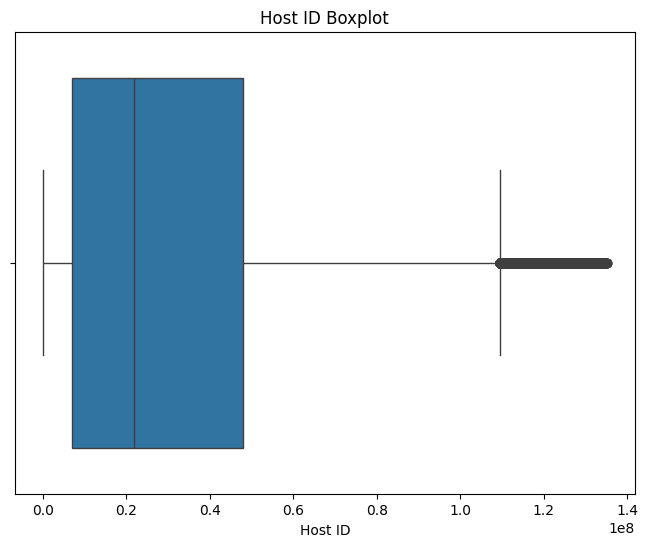

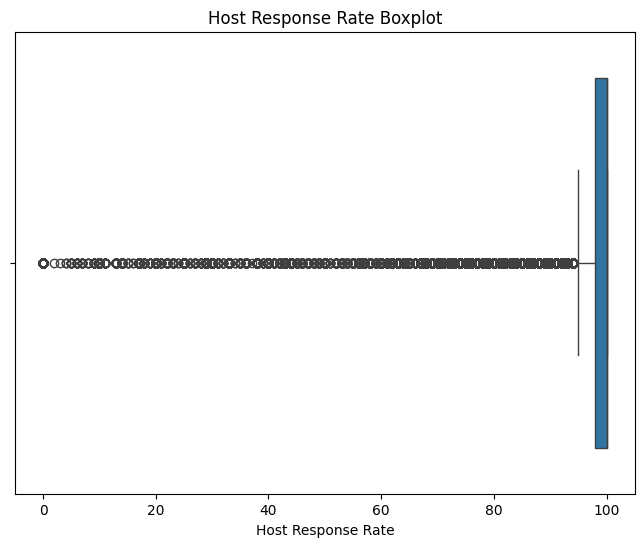

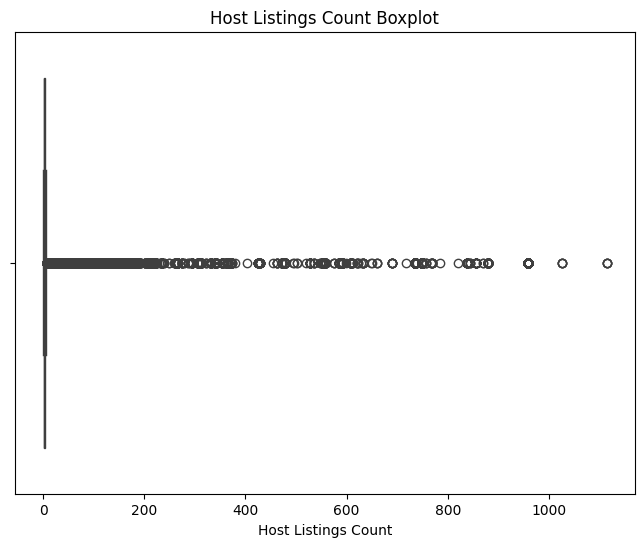

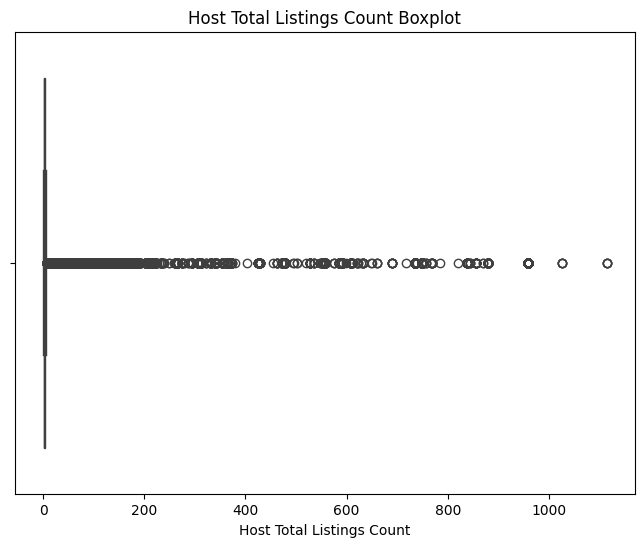

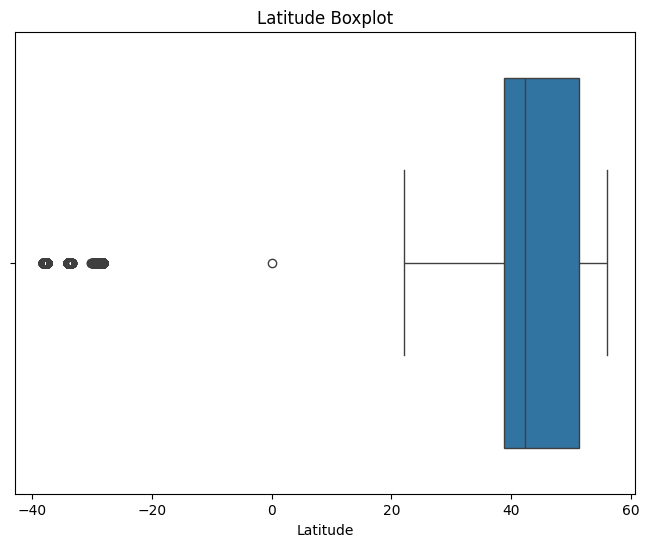

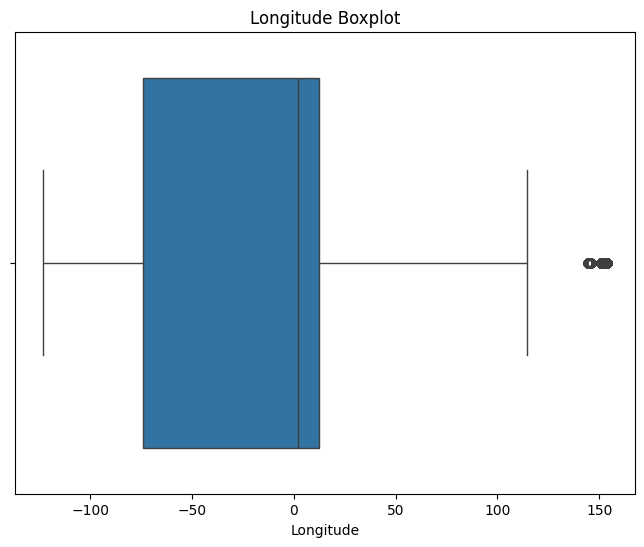

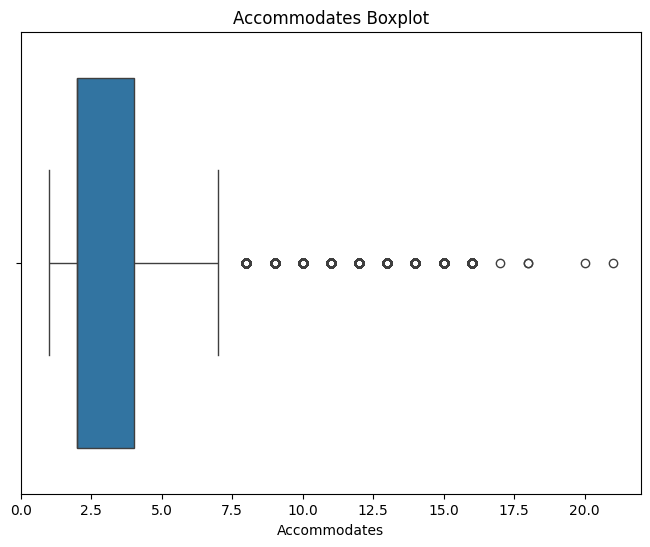

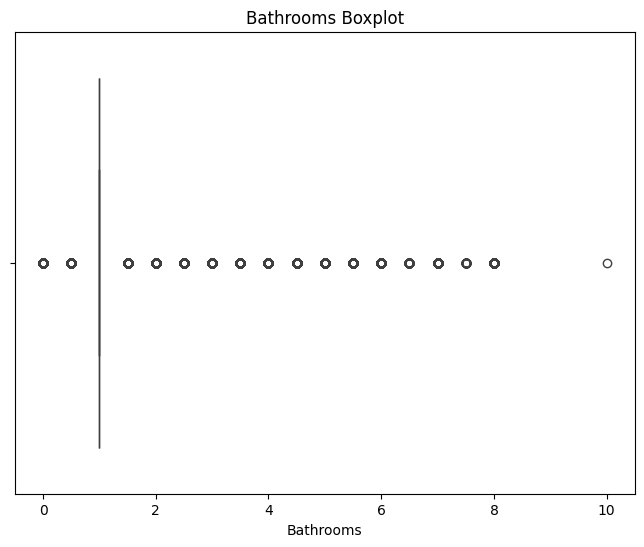

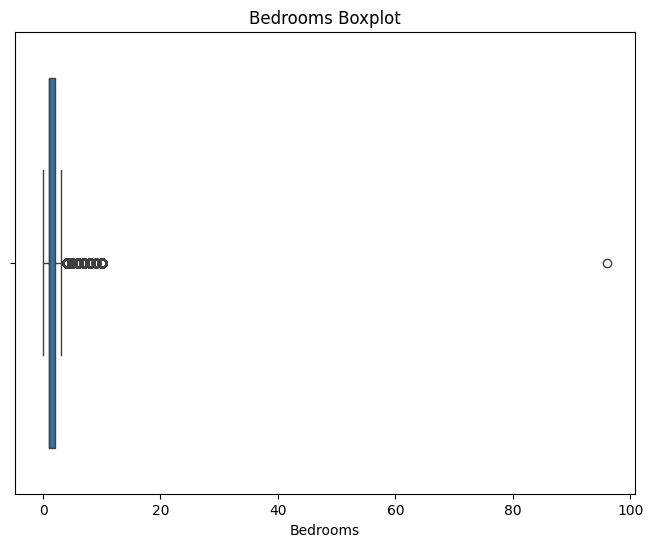

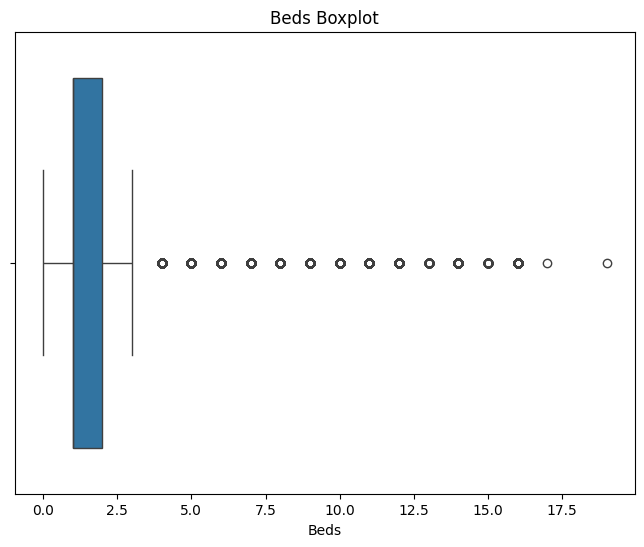

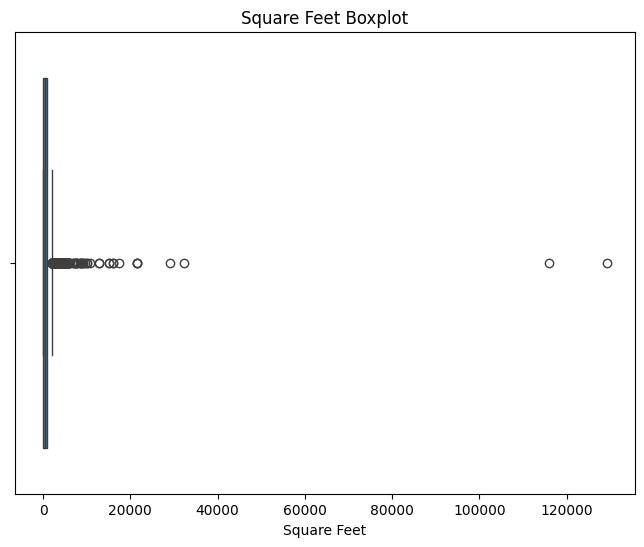

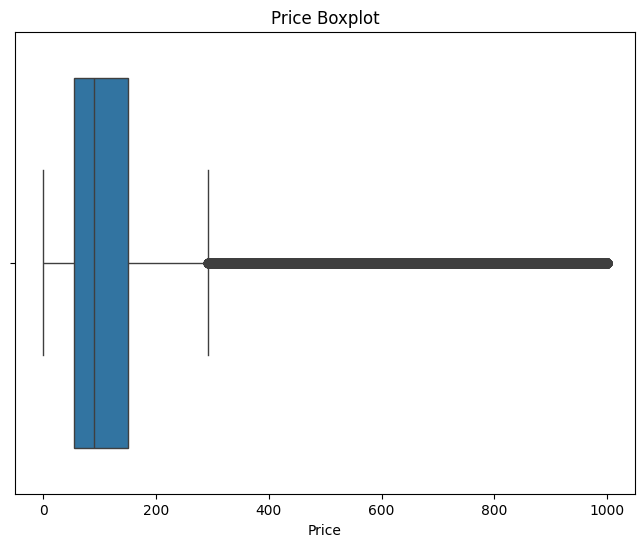

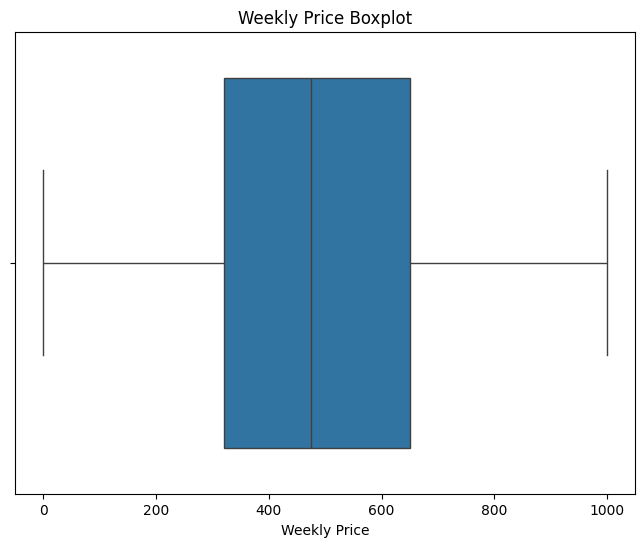

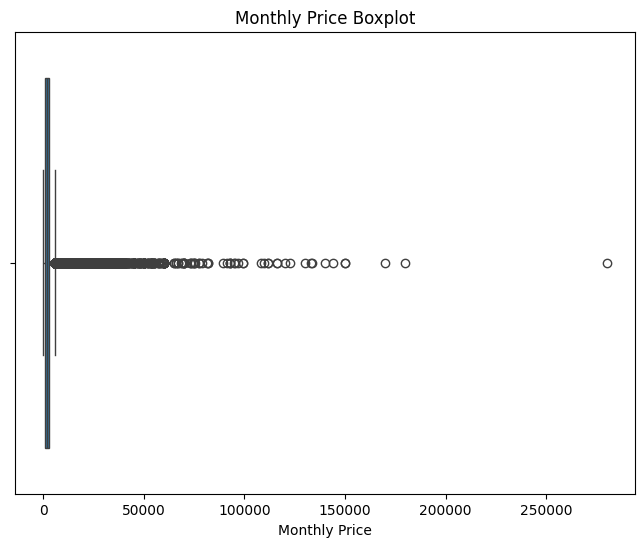

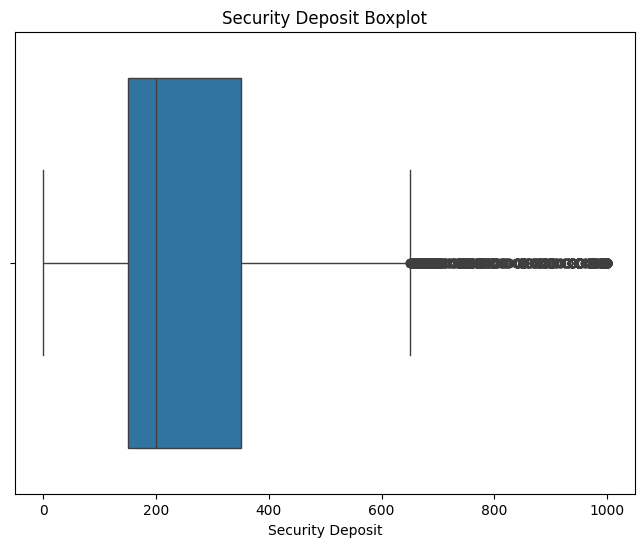

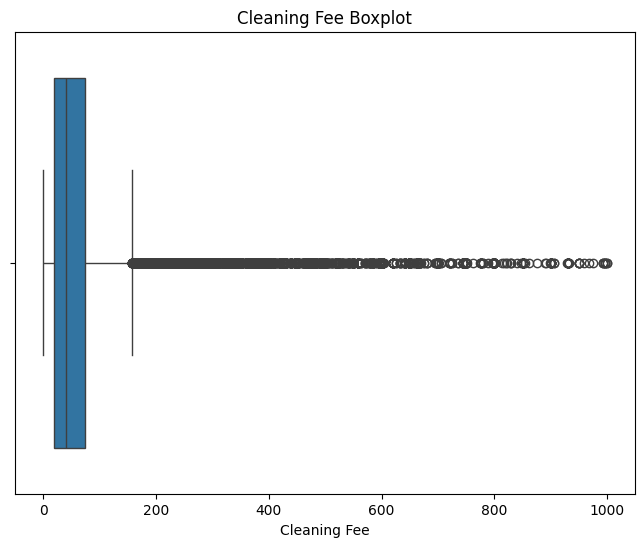

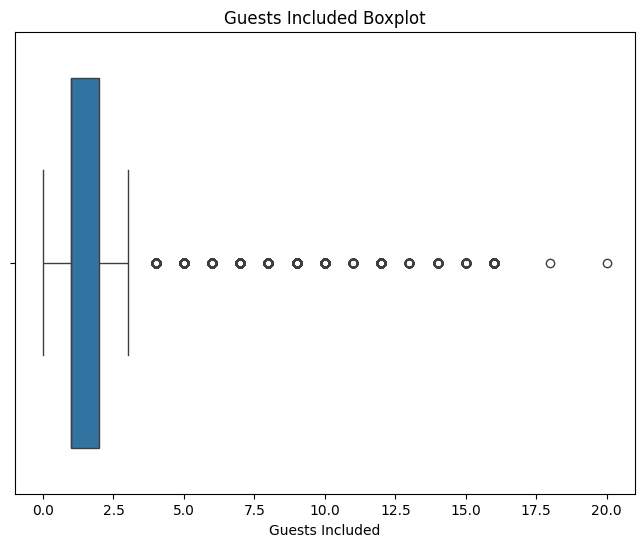

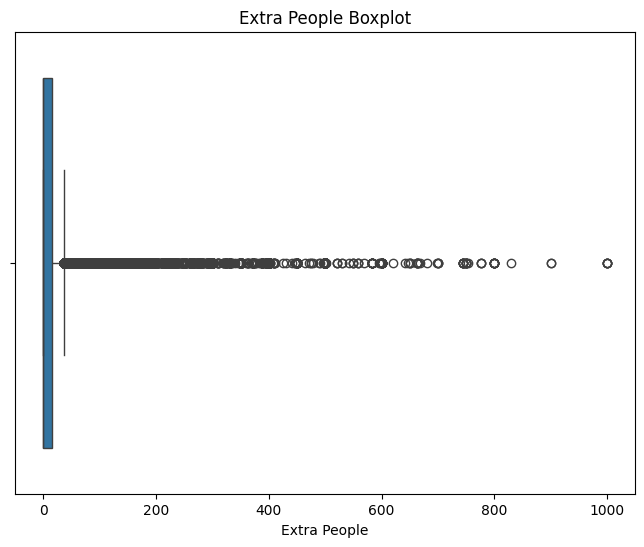

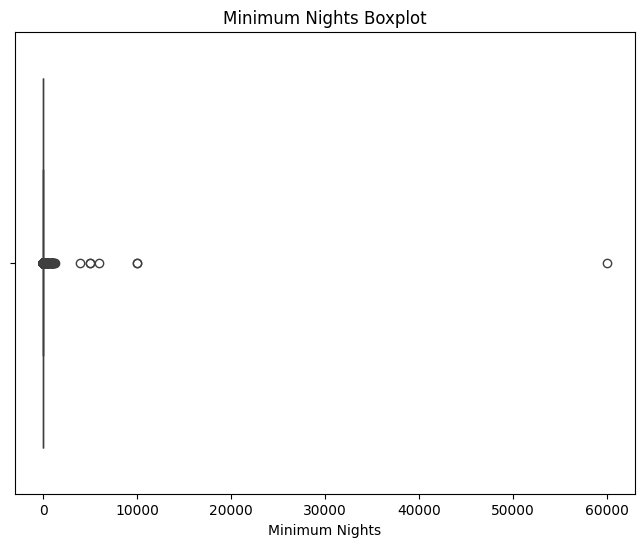

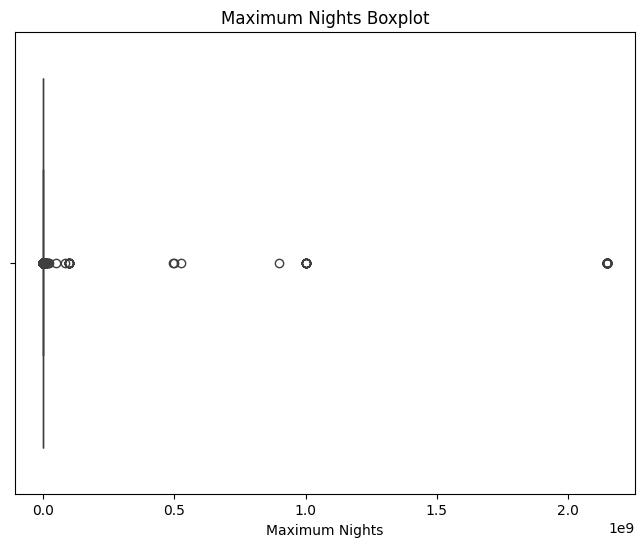

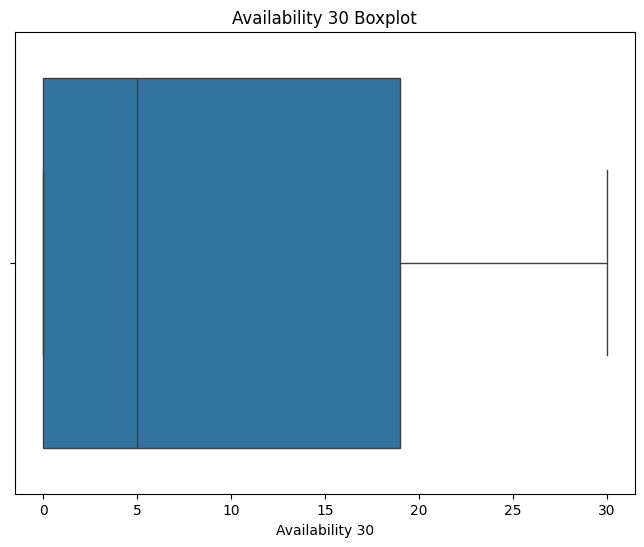

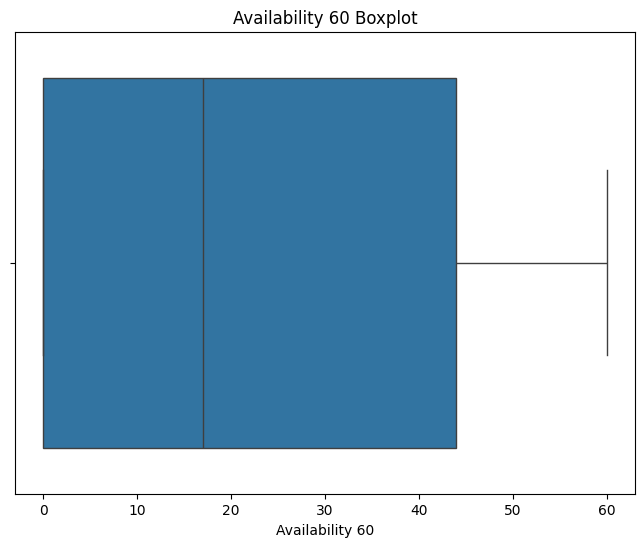

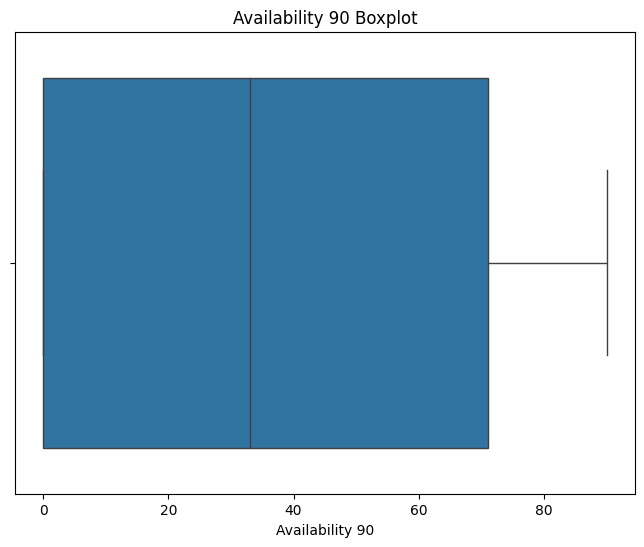

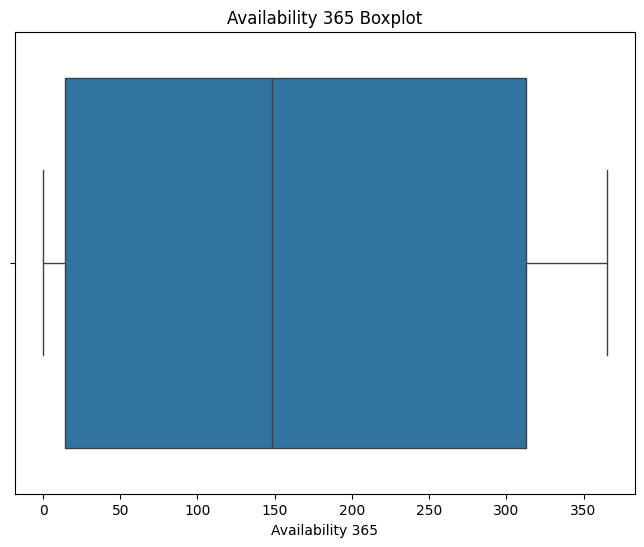

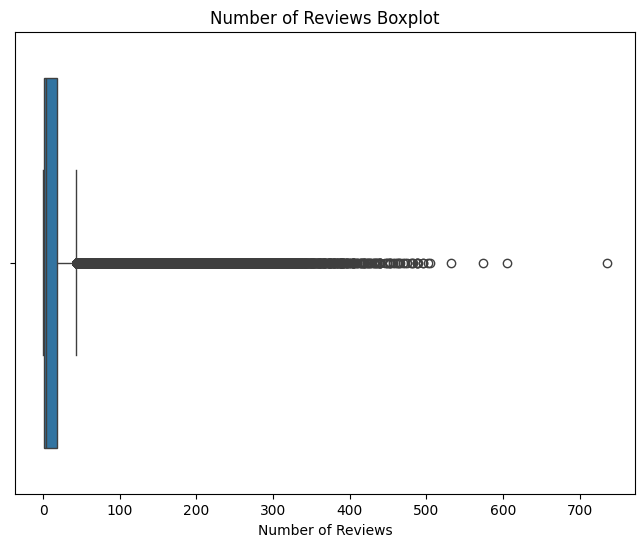

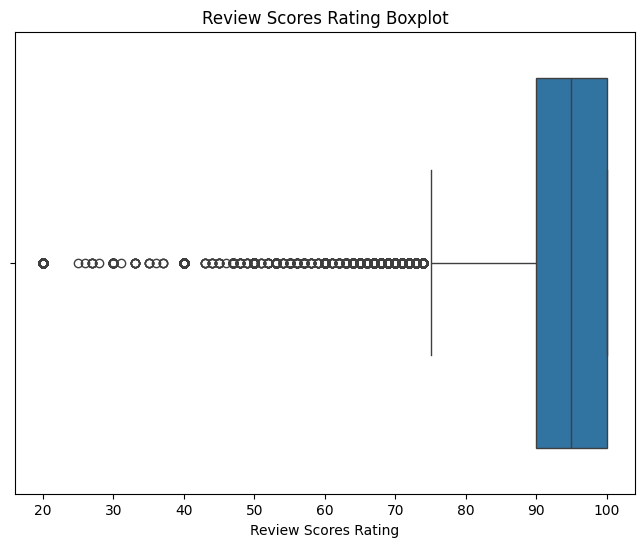

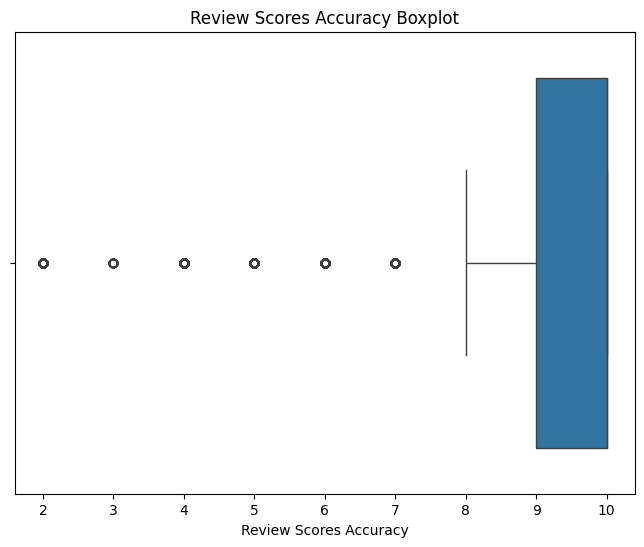

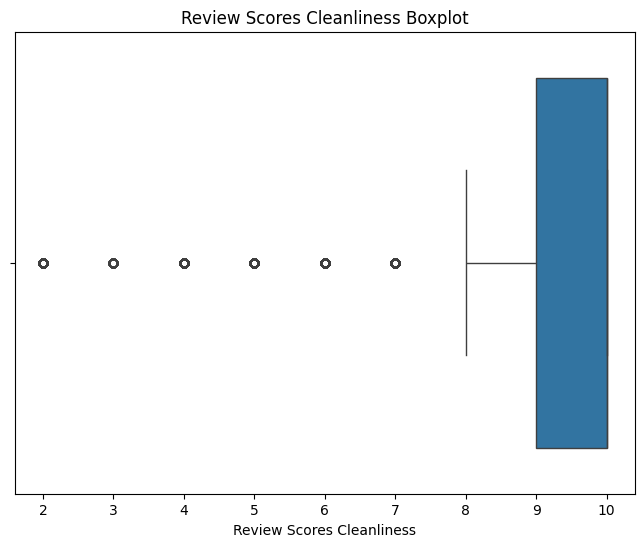

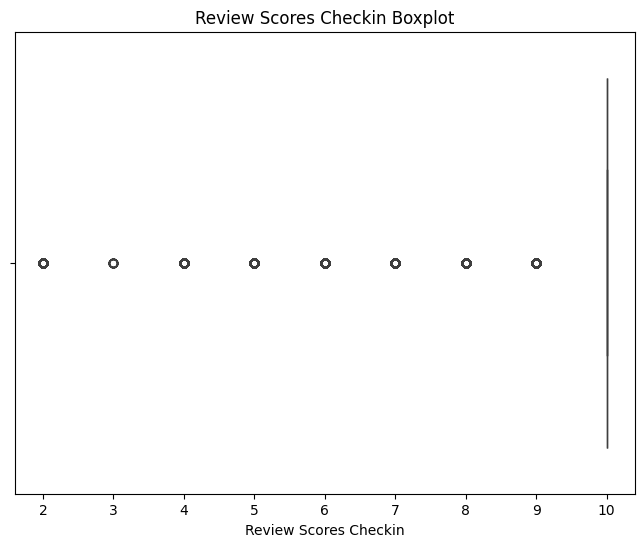

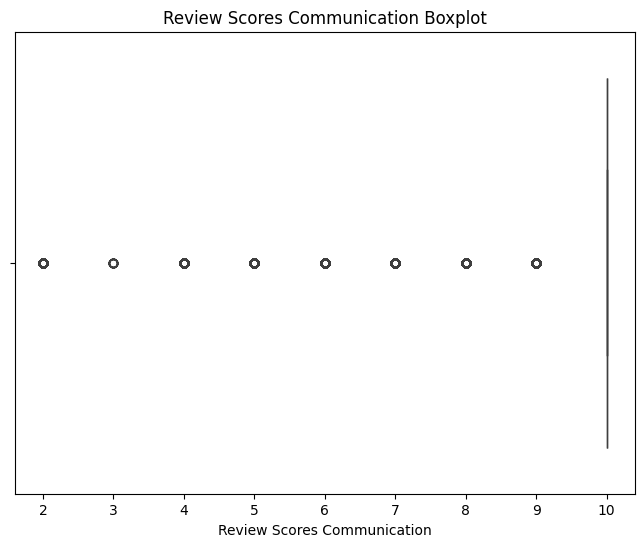

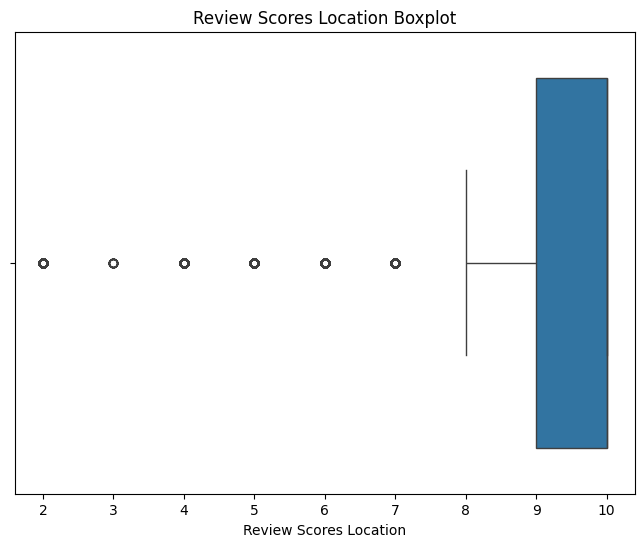

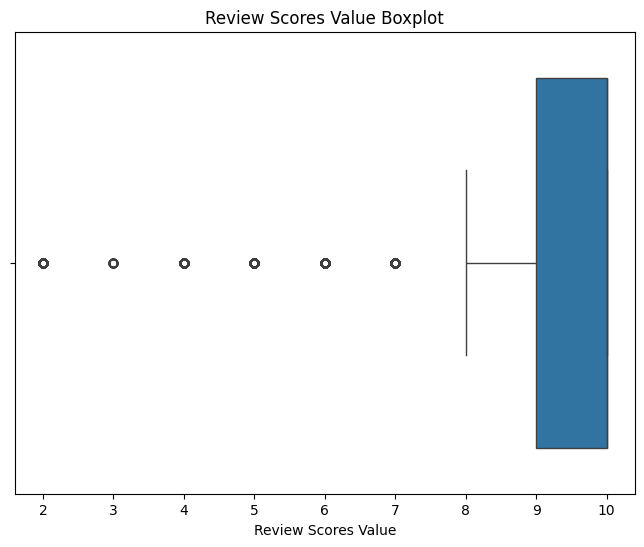

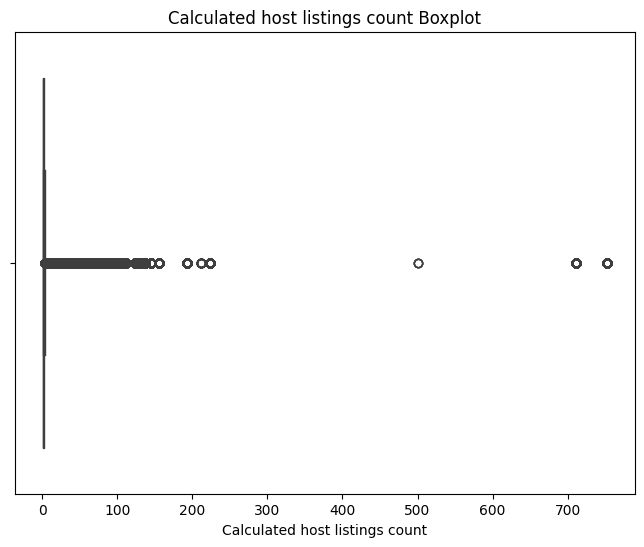

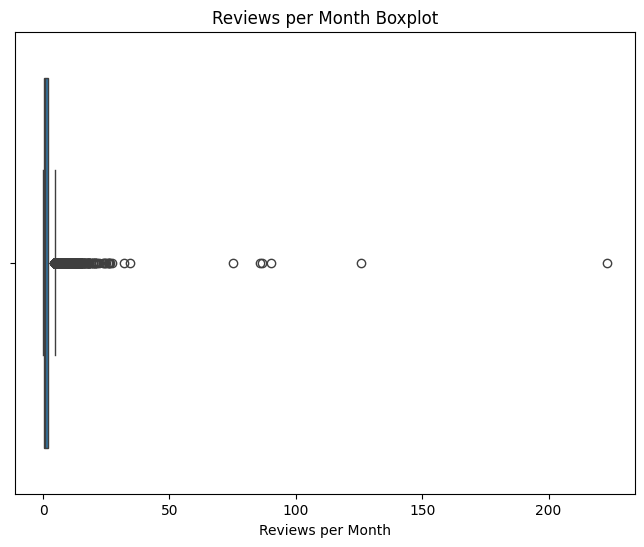

In [12]:
# Plot boxplots to identify outliers in numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.show()


In [14]:
# Calculate IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))

# Print the number of outliers for each column
print("\nOutliers detected using IQR method:")
outliers_count = outliers_iqr.sum().sort_values(ascending=False)
print(outliers_count)



Outliers detected using IQR method:
Bathrooms                         114272
Calculated host listings count     89056
Host Response Rate                 81366
Review Scores Checkin              81132
Review Scores Communication        75623
Host Listings Count                63362
Host Total Listings Count          63362
Beds                               57328
Number of Reviews                  55580
Price                              48906
Latitude                           40694
Longitude                          40693
Guests Included                    40629
Minimum Nights                     38496
Extra People                       34474
Accommodates                       24433
Reviews per Month                  22630
Cleaning Fee                       20997
Bedrooms                           18020
Review Scores Cleanliness          17562
Host ID                            16223
Review Scores Value                11081
Review Scores Rating               11020
Review Scores Accura

# Description of Outliers Detected Using the IQR Method

The outlier detection using the **Interquartile Range (IQR)** method has identified a number of variables with values outside the expected range, indicating potential outliers in the dataset. Below is a description of each of the variables with detected outliers and their potential implications.

---

### 1. **Host Response Rate** (81,366 outliers):
- **Description**: The `Host Response Rate` is the percentage of queries a host responds to. A significant number of outliers in this column indicates either hosts with **extremely low response rates** (near 0%) or those with **perfect response rates** (100%).
- **Implication**: Extreme response rates are caused by hosts who are either inactive or highly responsive, which might not reflect typical host behavior. These outliers should be further investigated.

### 2. **Host Listings Count** and **Host Total Listings Count** (63,362 outliers):
- **Description**: These columns represent the number of listings hosted by a particular individual. The presence of outliers in these columns suggests that some hosts have a significantly larger number of listings than others.
- **Implication**: Professional property managers or large-scale hosts may dominate this space, having many more listings than typical hosts.

### 3. **Accommodates** (24,433 outliers):
- **Description**: The `Accommodates` column represents the number of people a listing can host. Outliers in this indicate extremely large or unusually small accommodations.
- **Implication**: A small number of outliers with very high values (e.g., 20+ guests) correspond to large homes or event spaces, while outliers with low values correspond to listings with very limited accommodations, like small rooms.

### 4. **Bathrooms, Bedrooms, and Beds** (114,272, 18,020, and 57,328 outliers):
- **Description**: These columns represent the number of bathrooms, bedrooms, and beds in each listing. Outliers suggest that some listings have unusual configurations of these features such as a very high number of bathrooms, bedrooms, or beds.
- **Implication**: These outliers are likely associated with larger properties.
### 5. **Square Feet** (393 outliers):
- **Description**: This column represents the size of the property. The outliers here are listings with extremely large or very small properties.
- **Implication**: Extreme outliers could indicate luxury properties, while smaller outliers suggest atypically small living spaces.
### 6. **Price** (48,906 outliers):
- **Description**: The `Price` column contains the nightly cost of renting the listing. Outliers here often indicate **luxury properties** or perhaps **erroneous data** (e.g., listings with very low or very high prices).
- **Implication**: A small number of listings might have extremely high prices, possibly due to luxury properties or data input errors. This feature will be used as our target, so depending on the model we will have to take these into careful consideration when modeling is carried out.

### 7. **Weekly Price and Monthly Price** (0 and 8,648 outliers):
- **Description**: These columns represent the cost of the listing for a week or a month. A lack of values for the **Weekly Price** (0 outliers) suggests that this feature is missing for most listings, which is in line with our previous exploration of missingness. **Monthly Price** outliers represent a few listings with very high monthly prices.
- **Implication**: The absence of weekly prices for most listings indicates that this feature is not commonly used, while the monthly price outliers indicates properties with extreme rates or large discrepancies in pricing.

### 8. **Security Deposit and Cleaning Fee** (7,518 and 20,997 outliers):
- **Description**: These columns represent additional charges for the property. Outliers indicate unusually low or high security deposits or cleaning fees.
- **Implication**: Properties with very high security deposits or cleaning fees might be luxury or high-maintenance properties. These fees could also reflect anomalies in data reporting or spurrious data.

### 9. **Guests Included and Extra People** (40,629 and 34,474 outliers):
- **Description**: These columns represent the number of guests included in the base price and the cost for extra guests. Outliers here could indicate large accommodations with high additional charges for extra guests.
- **Implication**: Listings with a high number of extra guests or a large guest base should be taken into account when data cleaning is carried out, as they may suggest large venues or event spaces, which could influence pricing prediction.

### 10. **Minimum Nights and Maximum Nights** (38,496 and 703 outliers):
- **Description**: These columns define the minimum and maximum stay required by the host. Outliers suggest that some listings have unusually high or low stay requirements.
- **Implication**: Properties with high minimum or maximum nights could correspond to either specific event spaces or unique listings with special rules.

### 11. **Availability 30, Availability 60, Availability 90, Availability 365** (0 outliers):
- **Description**: These columns represent the availability of listings over different time frames. A value of 0 in these columns might suggest that the listing is never available for booking.
- **Implication**: These outliers could indicate listings that are either permanently unavailable or those with unavailable booking data.

### 12. **Number of Reviews** (55,580 outliers):
- **Description**: This column indicates the total number of reviews for each listing. Outliers here indicate that some listings have a very high number of reviews.
- **Implication**: Listings with high numbers of reviews are often long-established or very popular. These outliers should be considered in the context of host engagement and listing activity.

### 13. **Review Scores (Rating, Accuracy, Cleanliness, Checkin, Communication, Location, Value)** (Outliers ranging from 7,518 to 11,020):
- **Description**: These columns represent various ratings given by guests. Outliers indicate that certain listings have unusually high or low scores in specific categories.
- **Implication**: Listings with outlier review scores, especially those with very low ratings, may need closer inspection to determine if they are genunine.

### 14. **Calculated Host Listings Count** (89,056 outliers):
- **Description**: This column represents the total number of listings a host has, calculated from their host profile. Outliers here indicate that some hosts manage a very large number of listings.
- **Implication**: Professional hosts or property managers are likely represented in the outliers, and the extreme values might need to be treated separately for more accurate analysis.

### 15. **Reviews per Month** (22,630 outliers):
- **Description**: This column represents the number of reviews a listing receives on average each month. Outliers here could suggest listings that receive a very high number of reviews on a regular basis.
- **Implication**: Listings with a high number of reviews per month are likely highly popular or have been on the platform for a long time. These should be considered when assessing engagement and pricing.

### Conclusion:
The IQR method has detected many outliers across various variables in the dataset, with some columns having unusually high or low values. These outliers often correspond to listings with specific characteristics, such as luxury properties, large accommodations, or highly active hosts. It is important to handle these outliers appropriately as they might significantly impact modeling techniques we will use.


## Data Cleaning 

#### 1. Removal of columns with high missing values:
We will deal with columns with high missing values by removing them from the dataframe.

In [17]:
cols_to_drop = ["Space", "Neighborhood Overview", "Notes", "Transit", "Access", 
                "Interaction", "House Rules", "Host About", "Host Acceptance Rate",
                "Neighbourhood Group Cleansed", "Square Feet", "Weekly Price", 
                "Monthly Price", "Security Deposit", "Cleaning Fee", "License", "Jurisdiction Names", "Has Availability"]

df.drop(columns=cols_to_drop, inplace=True)


#### 1a. Removal of ID and URL columns:
We'll drop these columns as well since they won't add any predictive power to our models.

In [18]:
df.drop(columns=['Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
                 'Host Thumbnail Url', 'Host Picture Url', 'ID','Listing Url', 'Scrape ID', 'Host ID',
                'Host URL'], inplace=True)

#### 1b. Removal of other text based columns:
We dropped Name, Description, and Summary since noise would be present if they are encoded by their mean price in Mean Target Encoding. Geolocation is also removed since it leads to redundancy and could lead to overfitting due to being highly correlated to Price. 

In [19]:
df = df.drop(columns=['Name', 'Description', 'Summary', 'Geolocation'])

#### 2. Perform Data Imputation for columns with low to moderate missing values:
We will deal with these columns by imputing median and modes or other appropriate values.

In [20]:
# fill missing cols with appropriate values
categorical_fill_values = {
    "Host Response Time": "Unknown",
    "Host Neighbourhood": "Unknown",
    "State": df["State"].mode(dropna=True)[0] if "State" in df.columns else "Unknown",
    "Zipcode": df["Zipcode"].mode(dropna=True)[0] if "Zipcode" in df.columns else "00000",
    "Market": df["Market"].mode(dropna=True)[0] if "Market" in df.columns else "Unknown",
    #"Name": "Unnamed Listing",
    #"Summary": "No description",
    #"Description": "No description",
    "Property Type": df["Property Type"].mode(dropna=True)[0] if "Property Type" in df.columns else "Other",
    "Room Type": df["Room Type"].mode(dropna=True)[0] if "Room Type" in df.columns else "Unknown",
}

for col, value in categorical_fill_values.items():
    if col in df.columns:
        df[col] = df[col].fillna(value)

# specify the column names to fill with median values
numerical_fill_values = ["Host Response Rate", "Bathrooms", "Bedrooms", "Beds", "Price"]

for col in numerical_fill_values:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median(skipna=True))

# fill review-related numerical columns with median
review_cols = [
    "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness",
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location",
    "Review Scores Value"
]

for col in review_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median(skipna=True))

# fill Reviews per Month with 0 since missing most likely means there weren't any reviews
if "Reviews per Month" in df.columns:
    df["Reviews per Month"] = df["Reviews per Month"].fillna(0)


# fill availability columns
availability_cols = ['Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']
df[availability_cols] = df[availability_cols].fillna(0)

# fill remaining columns with appropriate values
df['Host Name'] = df['Host Name'].fillna("Unknown")
df['Host Since'] = df['Host Since'].fillna("Unknown")
df['Host Location'] = df['Host Location'].fillna("Unknown")
df['Street'] = df['Street'].fillna("Unknown")
df['Neighbourhood'] = df['Neighbourhood'].fillna("Unknown")
df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].fillna(df['Neighbourhood Cleansed'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Smart Location'] = df['Smart Location'].fillna("Unknown")
df['Country Code'] = df['Country Code'].fillna(df['Country Code'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Cancellation Policy'] = df['Cancellation Policy'].fillna(df['Cancellation Policy'].mode()[0])
df['Features'] = df['Features'].fillna("None")
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())
df['Accommodates'] = df['Accommodates'].fillna(df['Accommodates'].median())
df['Guests Included'] = df['Guests Included'].fillna(df['Guests Included'].median())
df['Extra People'] = df['Extra People'].fillna(df['Extra People'].median())
df['Minimum Nights'] = df['Minimum Nights'].fillna(df['Minimum Nights'].median())
df['Maximum Nights'] = df['Maximum Nights'].fillna(df['Maximum Nights'].median())
df['Number of Reviews'] = df['Number of Reviews'].fillna(0)
df['Host Listings Count'] = df['Host Listings Count'].fillna(0)
df['Host Total Listings Count'] = df['Host Total Listings Count'].fillna(0)
df['Calculated host listings count'] = df['Calculated host listings count'].fillna(0)
df['Last Scraped'] = df['Last Scraped'].fillna("2016-01-01")
df['Host Verifications'] = df['Host Verifications'].fillna("Unknown")  
df['Bed Type'] = df['Bed Type'].fillna(df['Bed Type'].mode()[0])
df['Amenities'] = df['Amenities'].fillna("No Amenities")
df['Calendar Updated'] = df['Calendar Updated'].fillna("Unknown")
df['Calendar last Scraped'] = df['Calendar last Scraped'].fillna("2016-01-01")
df['First Review'] = df['First Review'].fillna("2016-01-01")
df['Last Review'] = df['Last Review'].fillna("2016-01-01")
#df['Geolocation'] = df['Geolocation'].fillna("0, 0")

In [21]:
# confirm that all missing values have been successfully imputed
print(df.isnull().sum().sum())

0


# 3. Relationships

### a. Correlations
We converted categorical and datetime variables to numerical values with feature encoding. Then, we used Mean Target Encoding to substitute each category with the mean price of that category for all the categorical variables. In order represent the datetime variables in a numerical format, we converted them to Unix timestamps. A correlation matrix heatmap is then created to notice the connections among the various variables in the dataset and correlations are then found among the variables with the target variable Price. 

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_le = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_le[col] = df_le.groupby(col)['Price'].transform('mean')
datetime_column = df.select_dtypes(include=['datetime64']).columns
for col in datetime_column:
    df_le[col] = df_le[col].astype('int64') // 10**9

<Axes: >

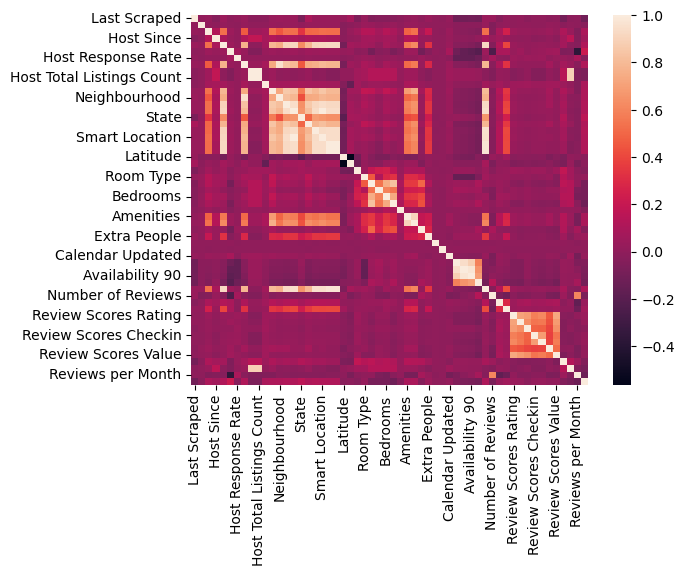

In [20]:
corr_matrix = df_le.corr()
sns.heatmap(corr_matrix)

#### 1. Explanation on Correlations among Variables with target variable Price
We found the absolute correlations among features with the target variable called Price to find the most correlated variables. Stronger connections to Price are represented by higher correlation values and this can aid in selecting features for modeling driven by data. 

In [22]:
#Correlations of other variables with Target Variable called Price
price_corr = corr_matrix['Price'].abs().sort_values(ascending=False)
price_corr[1:21]

Amenities                 0.907915
Street                    0.758031
Neighbourhood Cleansed    0.651992
Smart Location            0.638312
City                      0.635525
Zipcode                   0.633972
Host Location             0.620323
Calendar last Scraped     0.606382
Country                   0.601125
Country Code              0.601125
Market                    0.598073
Host Neighbourhood        0.561459
Neighbourhood             0.548729
Host Name                 0.533299
State                     0.433570
Accommodates              0.353368
Bedrooms                  0.342576
Room Type                 0.302463
Last Review               0.283269
Beds                      0.278763
Name: Price, dtype: float64

### b. Feature Importances
We split the dataset into training and testing sets such that 80% of the data is training and 20% is testing. We then trained a Random Forest Regressor to find feature importances and the notebook displays the top 20 most significant features from this model being trained. 

In [23]:
#Splitting data for Feature Importances
X = df_le.drop('Price', axis=1)
y = df_le['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [24]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

#### 1. Explanation on Random Forest Feature Importance
Here are the feature importances for the top 20 most important variables in predicting Airbnb prices using a Random Forest Regressor. The price estimation of this model is more influenced by higher feature importances. As a result, based on these feature importances, Amenities is considered the most important feature followd by Street and Host Name. These results can help in enabling predictive performance to be better and in selecting features. 

In [25]:
rf_im_df = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
print('Random Forest Feature Importance:')
print(rf_im_df.head(20))

Random Forest Feature Importance:
                   feature  importance
30               Amenities    0.822491
11                  Street    0.078144
2                Host Name    0.010630
27                Bedrooms    0.006011
21                Latitude    0.005862
25            Accommodates    0.005330
24               Room Type    0.005272
26               Bathrooms    0.004352
22               Longitude    0.003921
3               Host Since    0.003272
35        Calendar Updated    0.003165
42            First Review    0.002605
13  Neighbourhood Cleansed    0.002567
43             Last Review    0.002412
16                 Zipcode    0.002394
4            Host Location    0.002388
10      Host Verifications    0.002232
39        Availability 365    0.001991
41       Number of Reviews    0.001904
28                    Beds    0.001899
